# Introdução

## Modelo de regressão

Irei construir um modelo que prevê os crimes de uma determinada região, dada sua taxa de criminalidade. Para isso irei usar o dataset "dataframe_crimes.csv" que encontra-se neste mesmo repositório.

Irei utilziar modelos de regressão como regressão linear e vizinhos mais próximos e irei testar diferentes números de vizinhos pra ver qual se encaixa melhor no modelo.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
df = pd.read_csv("dataframe_crimes.csv")
print(df.shape)
df.head()

(2460, 5)


,ind_pop_cid,perc_pol,taxa_crim,nivel_ed,crimes
0,1.0,7.185471,62.082693,10.0,77
1,1.0,24.456750,88.244380,6.0,202
2,1.0,19.791772,94.930257,1.0,348
3,4.0,10.089496,41.791507,6.0,114
4,3.0,34.697495,67.615795,1.0,47


In [2]:
df.sample(15)

,ind_pop_cid,perc_pol,taxa_crim,nivel_ed,crimes
1945,2.0,23.927081,84.305012,8.0,139
1072,4.0,23.257727,54.121024,4.0,66
1872,1.0,20.191843,63.511427,3.0,162
704,5.0,3.708016,56.015084,9.0,171
786,5.0,30.889769,90.463039,10.0,122
2387,2.0,19.536230,38.825717,3.0,60
765,4.0,32.282125,71.355669,5.0,104
1615,4.0,11.589801,78.513097,9.0,282
335,3.0,30.491149,81.417474,8.0,25
783,5.0,9.331775,56.671069,9.0,167


In [3]:
def divide_dados(p, data):#Aqui ainda não conhecia o método train, test,split
    full_arr = []
    num_corte = round(len(data)*(1-p))
    arr_treino = data[:num_corte]
    arr_teste = data[num_corte:]
    full_arr.append(arr_treino)
    full_arr.append(arr_teste)
    print(arr_treino)
    print(arr_teste)
    return full_arr
    
full_arr = divide_dados(p=0.3, data=df)


      ind_pop_cid   perc_pol  taxa_crim  nivel_ed  crimes
0             1.0   7.185471  62.082693      10.0      77
1             1.0  24.456750  88.244380       6.0     202
2             1.0  19.791772  94.930257       1.0     348
3             4.0  10.089496  41.791507       6.0     114
4             3.0  34.697495  67.615795       1.0      47
...           ...        ...        ...       ...     ...
1717          2.0  33.214999  66.554431       7.0       5
1718          4.0  27.379961  92.088951       3.0     279
1719          1.0   1.921977  24.877278       3.0      99
1720          1.0  27.552167  94.877554       2.0     248
1721          2.0  30.968919  74.429224       4.0      59

[1722 rows x 5 columns]
      ind_pop_cid   perc_pol  taxa_crim  nivel_ed  crimes
1722          1.0  32.142413  78.007421       6.0      12
1723          4.0  19.595819  90.968914       6.0     296
1724          5.0  17.063139  86.412978       2.0     427
1725          2.0  14.741844  90.977796       7

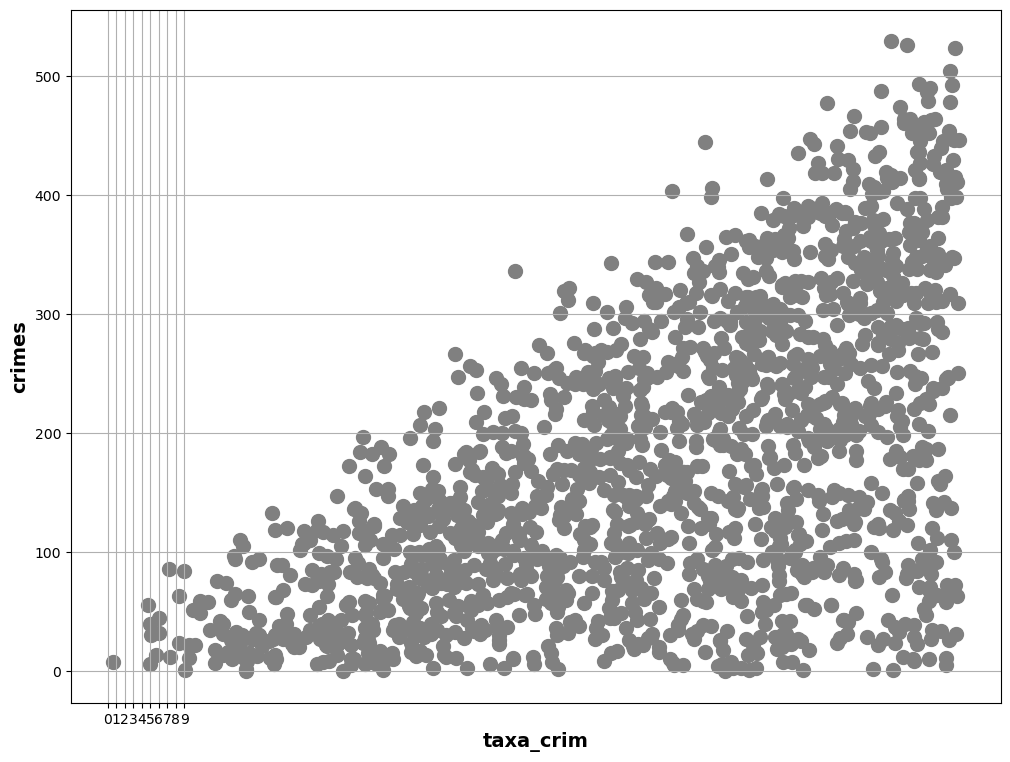

In [4]:
arr_treino = full_arr[0]
arr_teste = full_arr[1]

#TREINAMENTO

#plot da dispersão entre as variáveis

plt.figure(figsize=[12,9])
plt.scatter(arr_treino['taxa_crim'], arr_treino['crimes'], s = 100, c = 'gray')
plt.xlabel("taxa_crim", fontweight = 'bold', fontsize = 14)
plt.ylabel("crimes", fontweight = 'bold', fontsize = 14)
plt.xticks(range(0, 10))
plt.grid()
plt.show()


In [5]:
def MSE(y, y_pred):
    return np.mean((y - y_pred)**2)

def RMSE(y, y_pred):
    return np.sqrt(np.mean((y - y_pred)**2))

In [6]:
X = arr_treino['taxa_crim'].values.reshape(-1,1)
y = arr_treino['crimes'].values

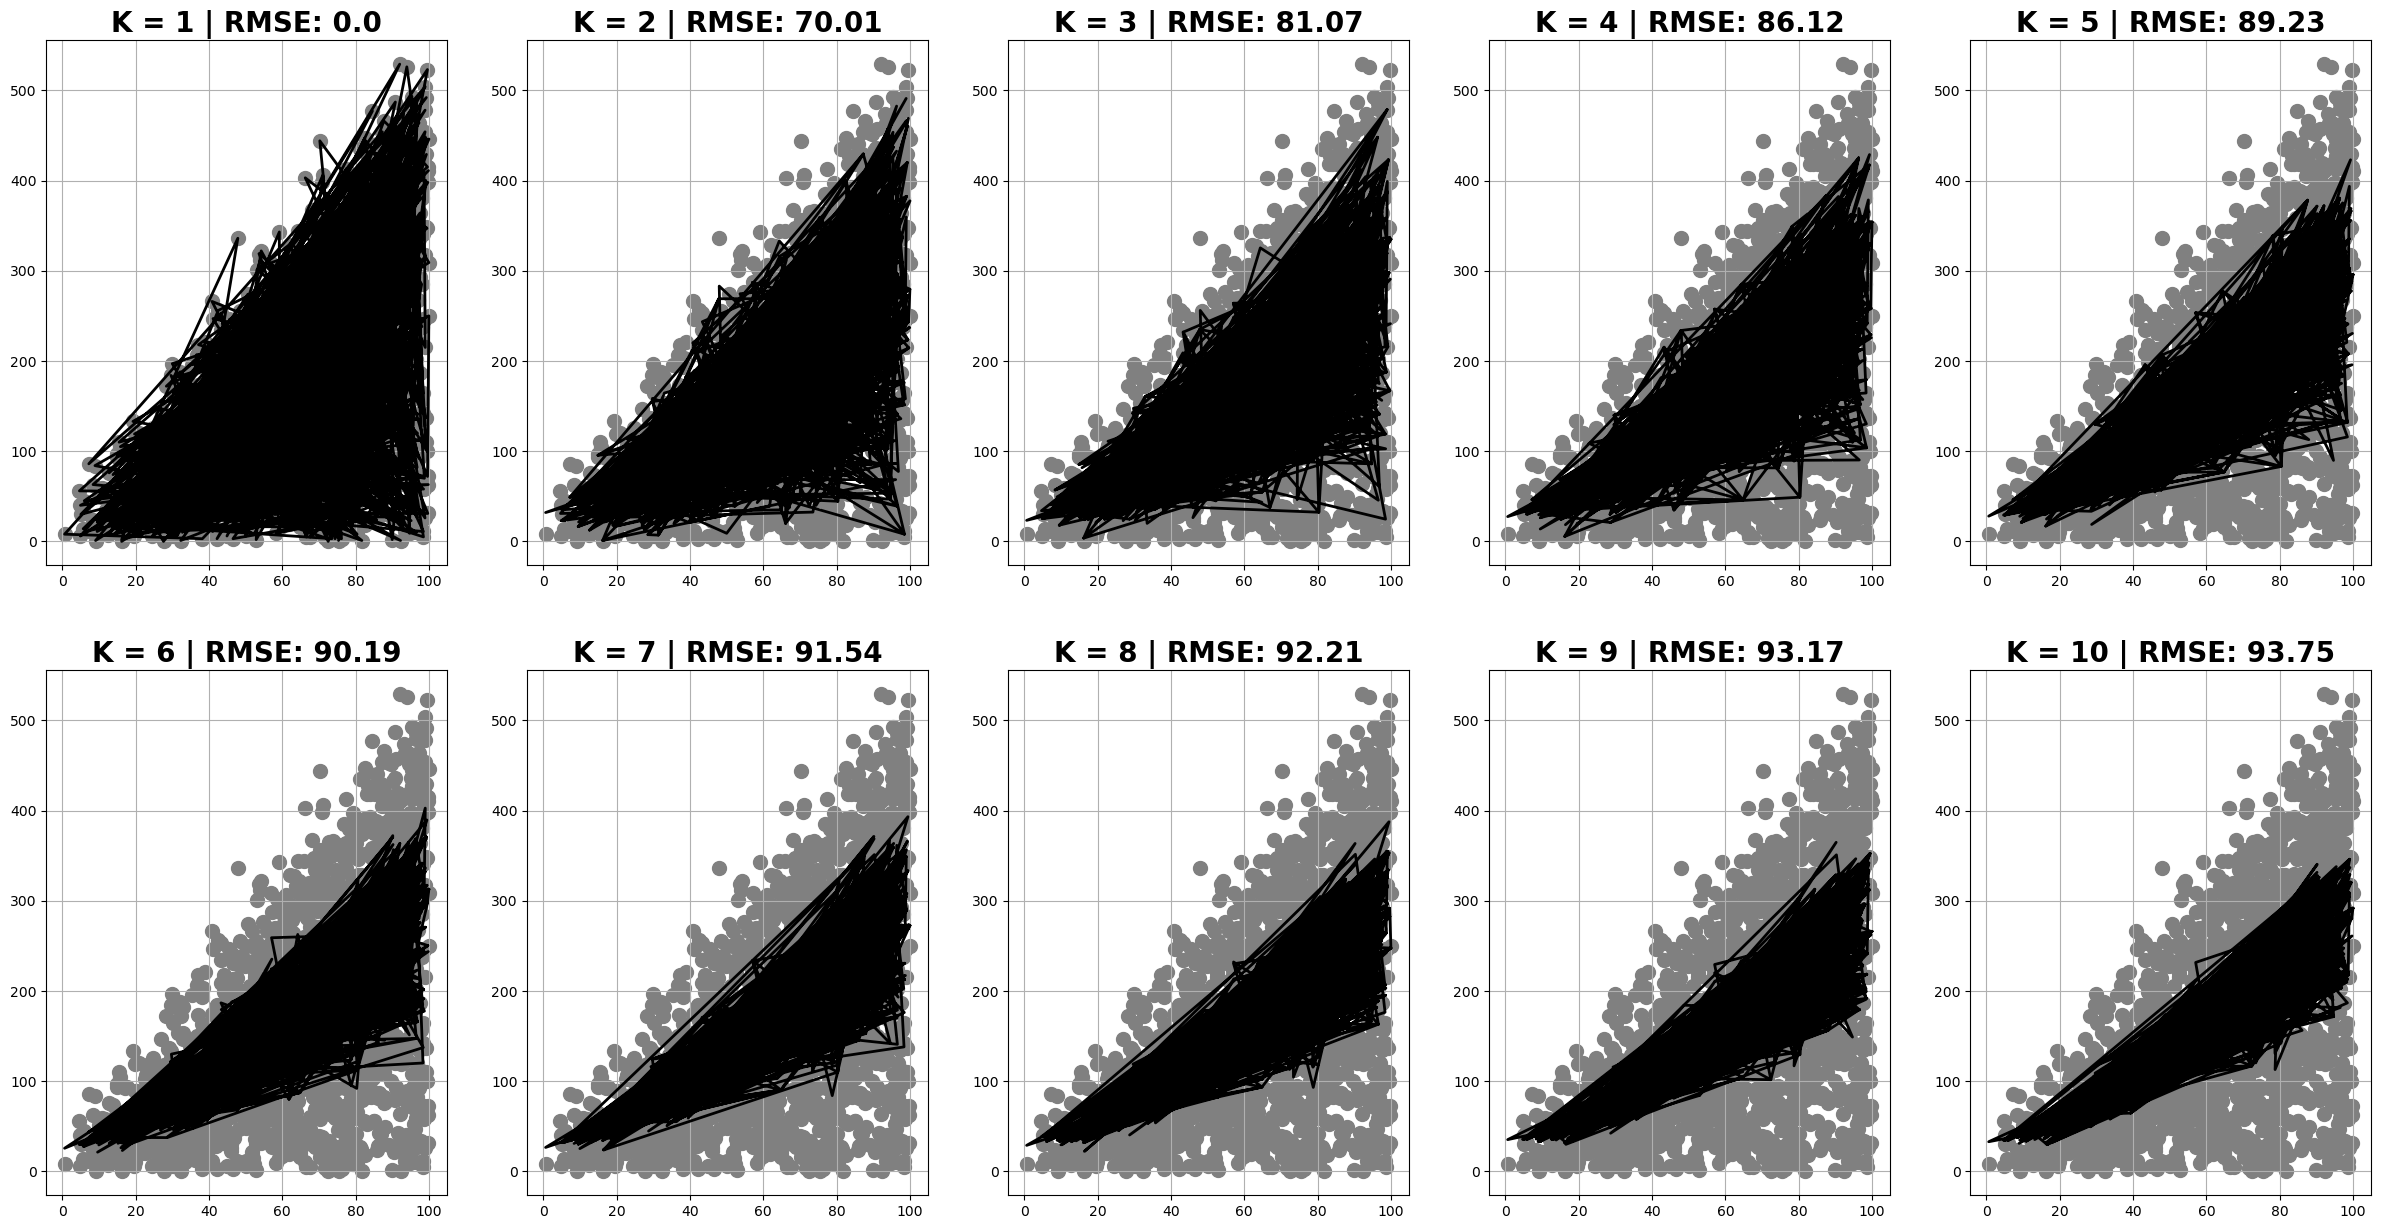

In [7]:
plt.figure(figsize=[30,15])

for i in range(1, 11):
    knn = KNeighborsRegressor(n_neighbors = i).fit(X, y)
    rmse_knn = np.round(RMSE(y = y, y_pred = knn.predict(X)), 2)
    
    plt.subplot(2,5,i)
    plt.title("K = "+str(i)+" | RMSE: " + str(rmse_knn), fontsize = 20, fontweight = 'bold')
    plt.plot(X, knn.predict(X), c = 'black', lw = 2)
    plt.scatter(arr_treino['taxa_crim'], arr_treino['crimes'], s = 100, c = 'gray')
    plt.grid()

plt.show()

In [8]:
def plota_curva_regressao(X, y, Xnovo, ynovo, modelo, nome_modelo):
    
    modelo.fit(X, y)
    
    predicao_dataset_treino = modelo.predict(X)
    predicao_dataset_novo = modelo.predict(Xnovo)
    
    rmse_dataset_treino = np.round(RMSE(y = y, y_pred = predicao_dataset_treino), 2)
    rmse_dataset_novo = np.round(RMSE(y = ynovo, y_pred = predicao_dataset_novo), 2)
    
    plt.figure(figsize = [20,6])
    plt.subplot(1,2,1)
    plt.title("Modelo: " + nome_modelo + " ~ RMSE DATASET TREINO: " + str(rmse_dataset_treino),
              fontsize = 14, fontweight = 'bold')
    plt.scatter(X, y, c = 'gray', s = 100)
    plt.plot(X, predicao_dataset_treino, c = 'blue', lw = 2, label = 'predição ')
    plt.legend(fontsize = 14)
    plt.grid()
    plt.subplot(1,2,2)
    plt.title("Modelo: " + nome_modelo + " ~ RMSE DATASET NOVO: " + str(rmse_dataset_novo),
              fontsize = 14, fontweight = 'bold')
    plt.scatter(Xnovo, ynovo, c = 'gray', s = 100)
    plt.plot(Xnovo, predicao_dataset_novo, c = 'blue', lw = 2, label = 'predição ')
    plt.legend(fontsize = 14)
    plt.grid()
    plt.show()

In [9]:
X = arr_treino['taxa_crim'].values.reshape(-1,1)
y = arr_treino['crimes'].values
Xnovo = arr_teste['taxa_crim'].values.reshape(-1,1)
ynovo = arr_teste['crimes'].values

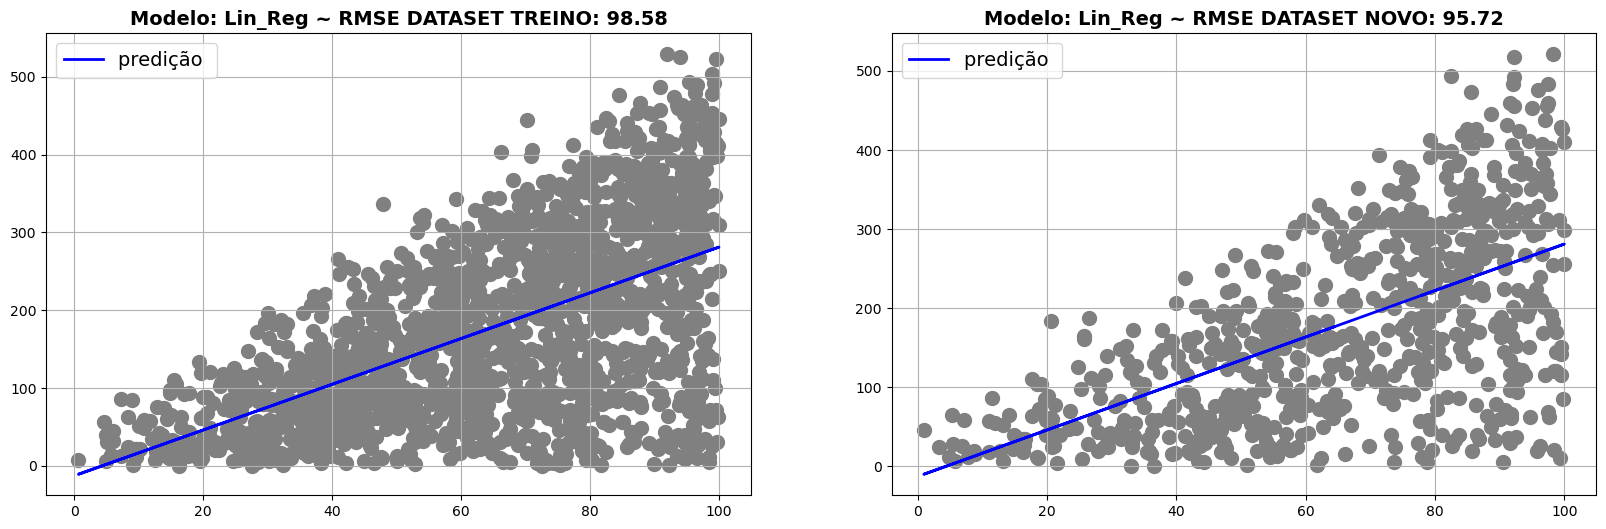

In [10]:
modelo = LinearRegression()
nome_modelo = 'Lin_Reg'
plota_curva_regressao(X, y, Xnovo, ynovo, modelo, nome_modelo)

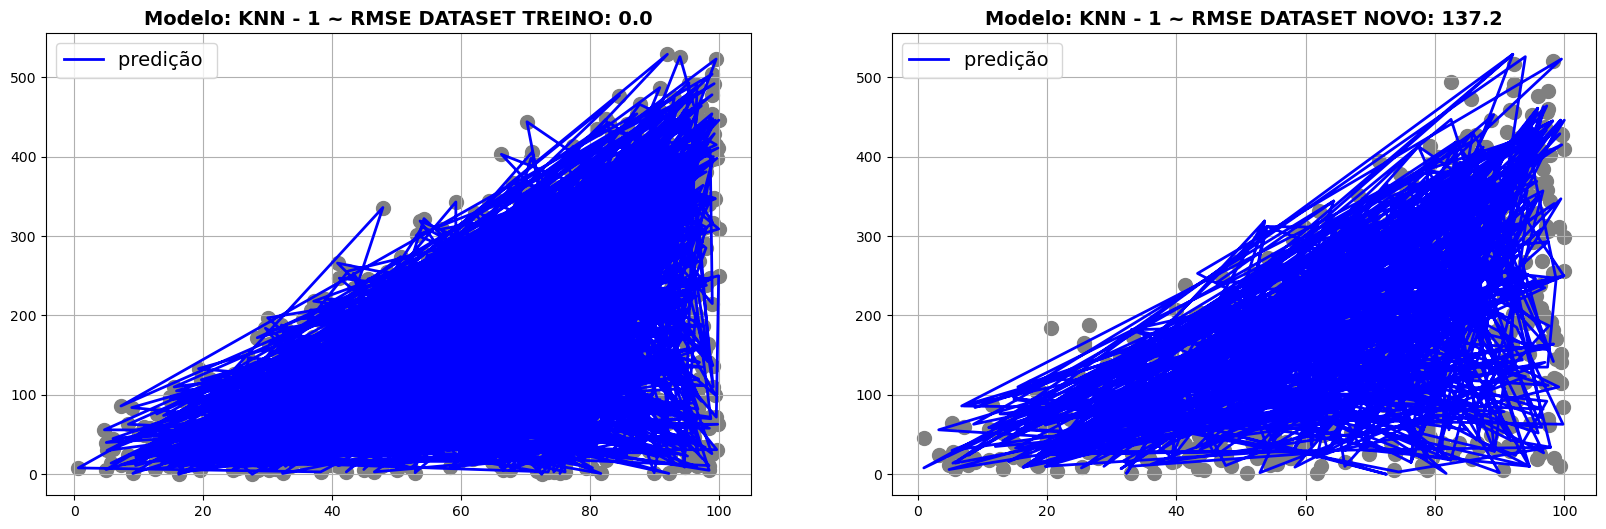

In [11]:
modelo = KNeighborsRegressor(n_neighbors = 1)
nome_modelo = 'KNN - 1'
plota_curva_regressao(X, y, Xnovo, ynovo, modelo, nome_modelo)

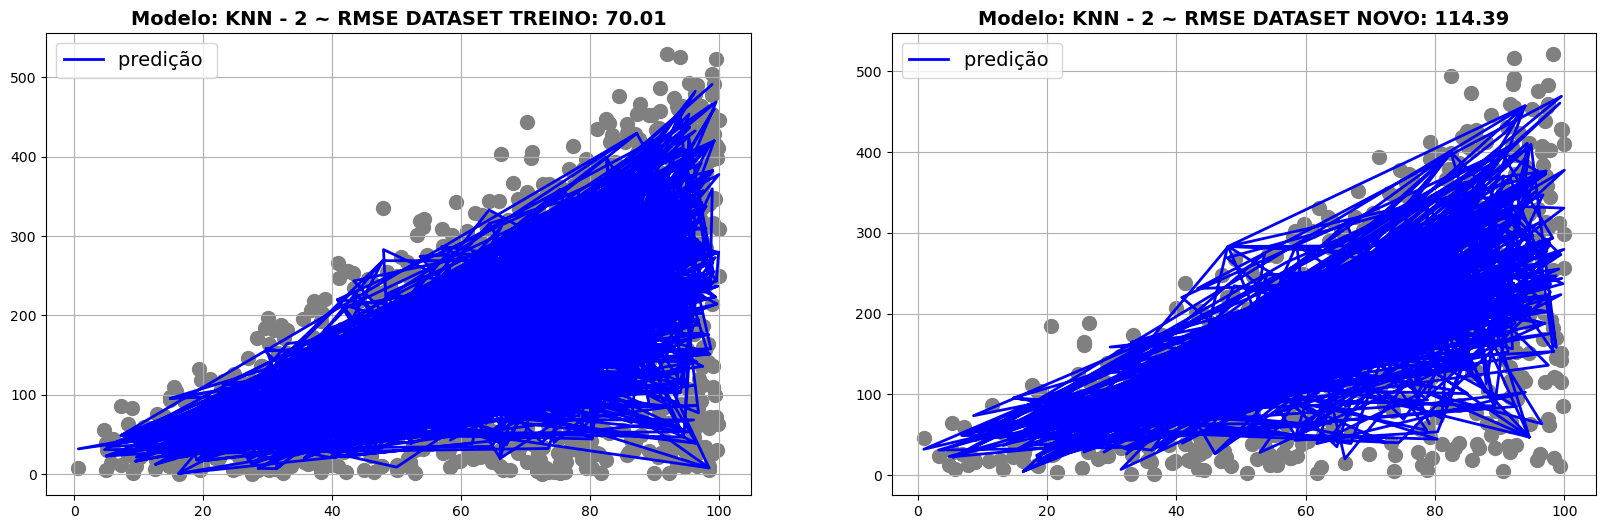

In [12]:
modelo = KNeighborsRegressor(n_neighbors = 2)
nome_modelo = 'KNN - 2'
plota_curva_regressao(X, y, Xnovo, ynovo, modelo, nome_modelo)

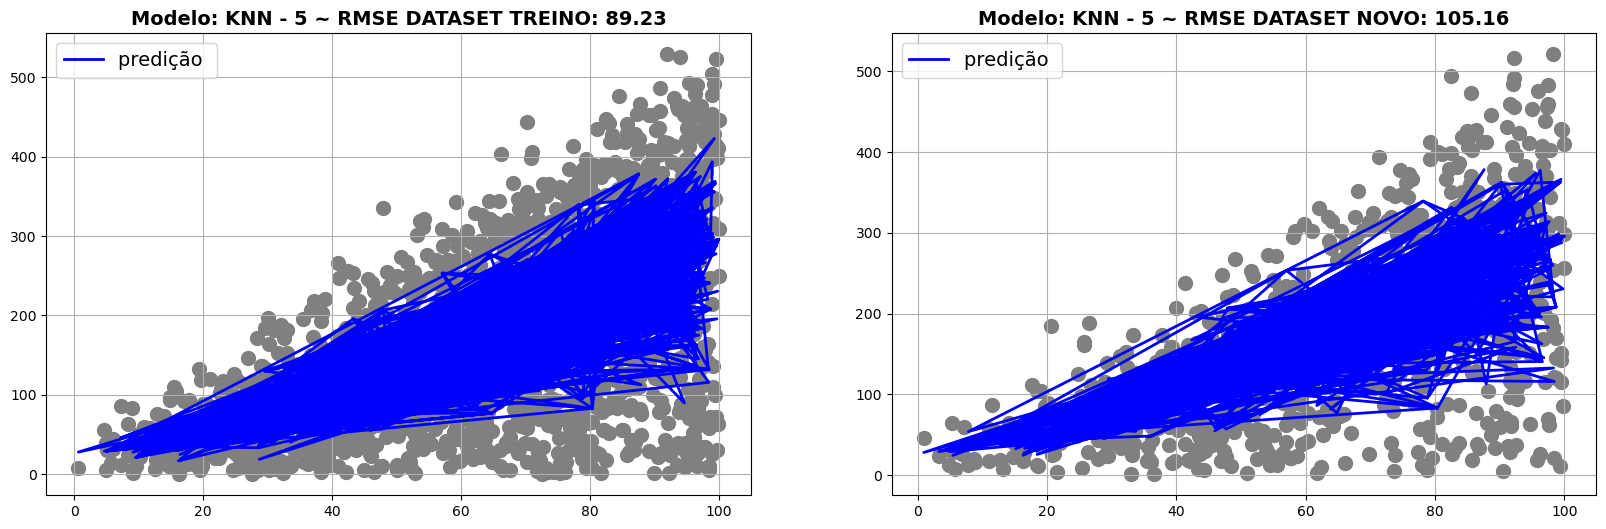

In [13]:
modelo = KNeighborsRegressor(n_neighbors = 5)
nome_modelo = 'KNN - 5'
plota_curva_regressao(X, y, Xnovo, ynovo, modelo, nome_modelo)

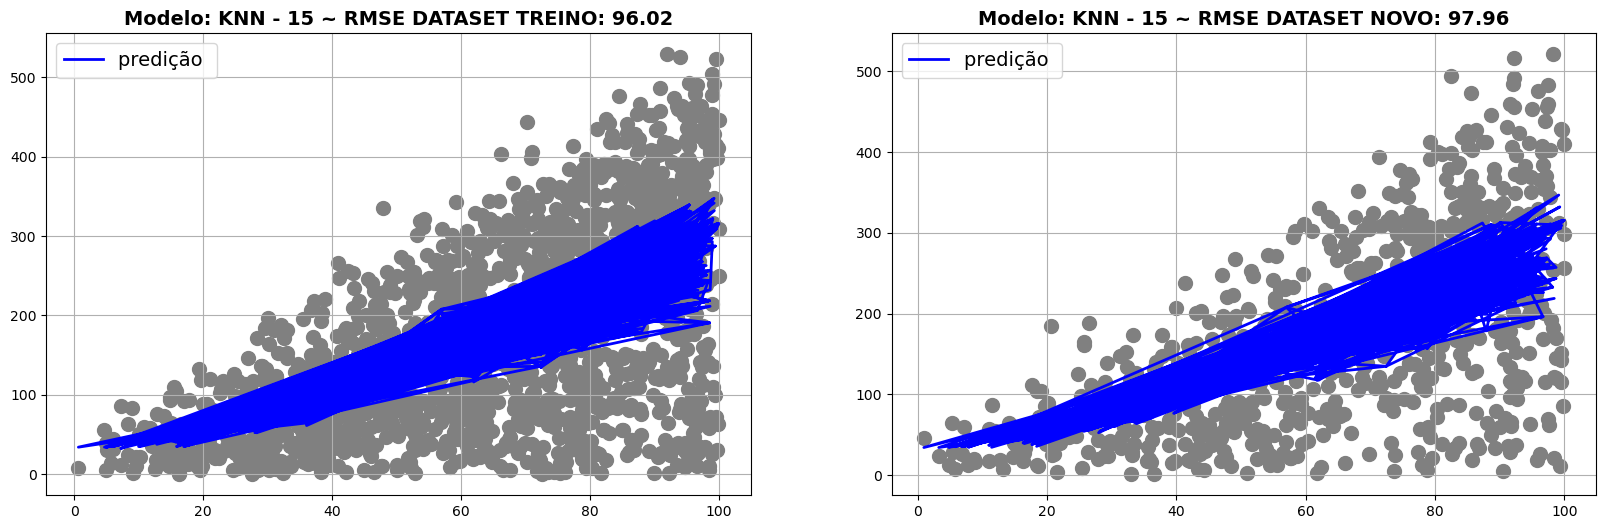

In [14]:
modelo = KNeighborsRegressor(n_neighbors = 15)
nome_modelo = 'KNN - 15'
plota_curva_regressao(X, y, Xnovo, ynovo, modelo, nome_modelo)

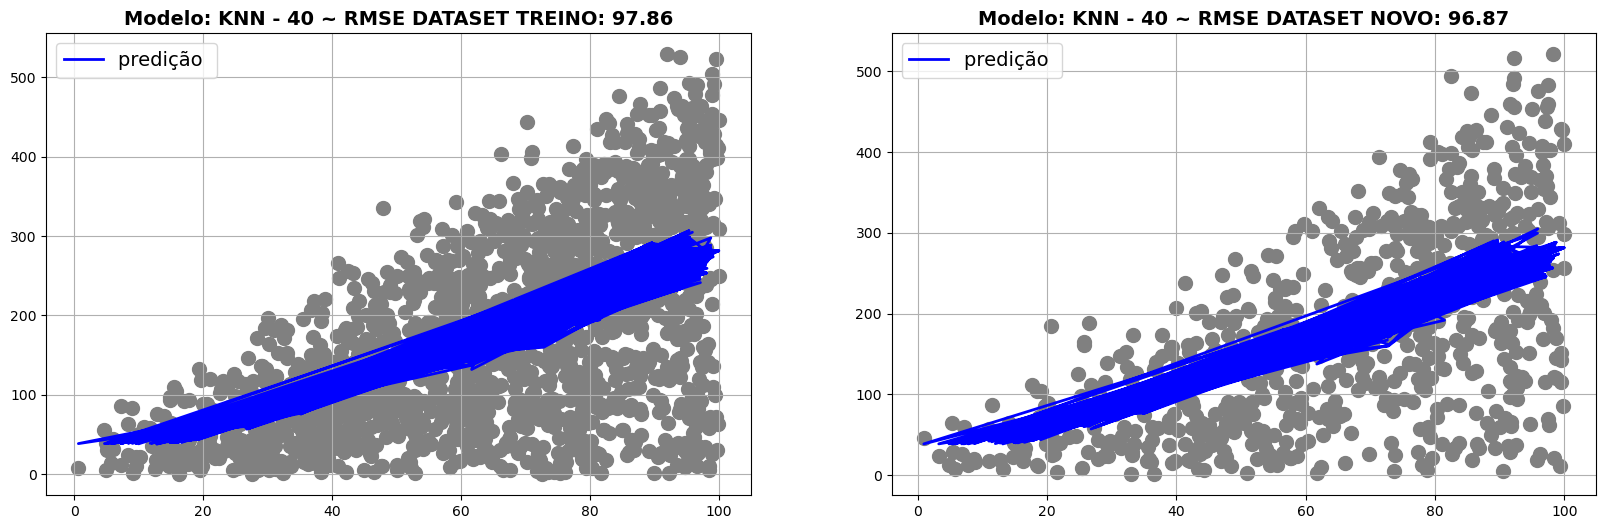

In [15]:
modelo = KNeighborsRegressor(n_neighbors = 40)
nome_modelo = 'KNN - 40'
plota_curva_regressao(X, y, Xnovo, ynovo, modelo, nome_modelo)

In [ ]:
# O modelo de regressão linear simples talvez não seja o ideal para a predição desses dados, pois, além de ter uma 
# quantidade muito grande de dados, eles são um pouco dispersos. Isso faz com que o modelo não preveja muito bem através de uma
# linha simples.
# Sobre o modelo de vizinhos próximos, podemos perceber que o modelo com poucos vizinhos (até 5), explica bem o modelo de treino,
# porém acaba sofrendo um pouco de overfitting no modelo de testes. A medida em que aumentamos os vizinhos, as bases de dados
# param de sofrer com overfitting, porém o modelo de treino passa a ter um pouco de underfitting, ou seja, o modelo acaba não 
# representando tão fielmente os dados de treino.

In [16]:
lm = LinearRegression()
lm

LinearRegression()

In [17]:
type(X), type(y)

(numpy.ndarray, numpy.ndarray)

In [18]:
#ajustando os dados para o formato correto  

X = arr_treino.values.reshape(-1,5)
y = arr_treino['crimes'].values.reshape(-1,1)
print(X.shape)
X

(1722, 5)


array([[  1.        ,   7.18547096,  62.08269348,  10.        ,
         77.        ],
       [  1.        ,  24.45675022,  88.24437995,   6.        ,
        202.        ],
       [  1.        ,  19.79177223,  94.93025656,   1.        ,
        348.        ],
       ...,
       [  1.        ,   1.92197714,  24.87727833,   3.        ,
         99.        ],
       [  1.        ,  27.5521674 ,  94.87755417,   2.        ,
        248.        ],
       [  2.        ,  30.96891886,  74.42922389,   4.        ,
         59.        ]])

In [19]:
y.shape

(1722, 1)

In [20]:
lm.fit(X, y)

LinearRegression()

In [21]:
ypred = lm.predict(X)
ypred

array([[ 77.],
       [202.],
       [348.],
       ...,
       [ 99.],
       [248.],
       [ 59.]])

In [22]:
RMSE(y = y, y_pred = ypred)

3.3712745416977846e-14

In [23]:
# Como podemos ver, o RMSE neste caso é praticamente nulo. Ao utilizar todas as variáveis disponíveis, o modelo fica 
# com uma capacidade de predição muito boa.